# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Thomas Dito Rigorastio
- **Email:** B244019E@devacademy.id
- **ID Dicoding:** B244019E

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah penyewaan sepeda berdasarkan musim?
- Bagaimana pengaruh hari kerja dan hari libur terhadap jumlah penyewaan sepeda?
- Seberapa besar dampak kondisi cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana tren penggunaan sepeda dari tahun 2011 hingga 2012?
- Faktor apa yang paling memengaruhi jumlah penyewaan sepeda (suhu, kelembapan, angin)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
# load dataset day.csv
day_data = pd.read_csv('data/day.csv')

day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
# load data hour.csv
hour_data = pd.read_csv('data/hour.csv')

hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- pada dataframe day_data dan hour_data sekilas terlihat normal, namun akan saya cek kembali pada kolom dteday apakah tipedata nya berupa datetime
- pada kolom windspeed, banyak yang berisi nilai 0, yang mana ini tidak mungkin, karena kecepatan angin tidak pernah 0

### Assessing Data

In [11]:
# melihat info basic dari day_data
print("Day Dataset Info:")
print(day_data.info())

Day Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


insight:
- pada informasi day_data, terlihat tidak ada missing value
- kolom dteday memiliki tipe data object, akan saya ganti ke datetime pada cleaning data

In [12]:
# melihat basic informasi dari hour_data
print("\nHour Dataset Info:")
print(hour_data.info())


Hour Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


insight:
- pada informasi hour_data, terlihat tidak ada missing value
- sama seperti pada df day_data, kolom dteday memiliki tipe data object, akan saya ganti ke datetime pada cleaning data

In [19]:
# melihat apakah ada missing value dari day_data
day_missing = day_data.isnull().sum()
print("\nMissing values:")
print(day_missing)


Missing values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [20]:
# melihat apakah ada missing value dari hour_data
hour_missing = hour_data.isnull().sum()
print("\nMissing values:")
print(hour_missing)


Missing values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


insight:
- baik dari dataframe day_data dan hour_data, tidak memiliki missing value

In [21]:
# cek duplikasi data dan parameter statistik dari dataframe day_data
day_duplicates = day_data.duplicated().sum()
print(f"\nduplikasi data pada day.csv: {day_duplicates}")

day_data.describe()


duplikasi data pada day.csv: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [22]:
# melihat duplikasi data dan parameter statistik dari hour_data
hour_duplicates = hour_data.duplicated().sum()
print(f"duplikasi data pada hour.csv: {hour_duplicates}")

hour_data.describe()

duplikasi data pada hour.csv: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


insight:
- pada df day_data dan hour_data tidak ditemukan duplikasi data
- kemudian untuk ringkasan parameter statistik nya juga terlihat cukup "normal"

In [25]:
# cek untuk value 0 di kolom hum dan windspeed pada day_data, mengingat pada df hour_data ada nilai 0 pada kolom windspeed. sehingga saya memiliki kecurigaan juga pada kolom hum
day_zero_values = day_data[(day_data['hum'] == 0) | (day_data['windspeed'] == 0)]
print("\nbaris dengan value/nilai 0 pada day.csv:")
print(day_zero_values)


baris dengan value/nilai 0 pada day.csv:
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
68       69  2011-03-10       1   0     3        0        4           1   

    weathersit      temp     atemp  hum  windspeed  casual  registered  cnt  
68           3  0.389091  0.385668  0.0   0.261877      46         577  623  


insight:
- terdapat satu baris pada kolom hum yang merepresentasikan humidity(kelembapan udara) yang berisi nilai 0
- yang mana tidak mungkin kelembapan udara bernilai 0

In [26]:
# cek untuk value 0 di kolom hum dan windspeed pada hour_data
hour_zero_values = hour_data[(hour_data['hum'] == 0) | (hour_data['windspeed'] == 0)]
print("\nbaris dengan value/nilai 0 hour.csv:")
print(hour_zero_values)


baris dengan value/nilai 0 hour.csv:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17319    17320  2012-12-29       1   1    12  12        0        6   
17320    17321  2012-12-29       1   1    12  13        0        6   
17322    17323  2012-12-29       1   1    12  15        0        6   
17330    17331  2012-12-29       1   1    12  23        0        6   
17350    17351  2012-12-30       1   1    12  19        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81

insight:
- terdapat 2202 baris pada kolom windspeed yang berisi nilai 0
- tidak mungkin juga kecepatan angin di suatu daerah bernilai 0 yang artinya tidak ada angin sama sekali
- baik pada kolom hum di day_data dan kolom windspeed di hour_data, akan saya ganti nilainya dengan nilai median pada data cleaning

### Cleaning Data

In [27]:
# convert kolom dteday ke tipe data datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

In [28]:
# mengganti nilai 0 pada kolom hum dan windspeed menggunakan median
day_data['hum'] = day_data['hum'].replace(0, day_data['hum'].median())
hour_data['windspeed'] = hour_data['windspeed'].replace(0, hour_data['windspeed'].median())

In [29]:
# cek kembali hasil replace value pada kolom hum
day_zero_check = day_data[(day_data['hum'] == 0)]
print("\nverifikasi nilai 0 pada kolom hum:")
print(day_zero_check)


Verification - Rows with 0 values in day.csv after cleaning:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [30]:
# cek kembali hasil replace value pada kolom windspeed
hour_zero_check = hour_data[(hour_data['windspeed'] == 0)]
print("\nverifikasi nilai 0 pada kiolom windspeed:")
print(hour_zero_check)


verifikasi nilai 0 pada kiolom windspeed:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight:**
- pada tahapan assessing data saya mendapati kolom dteday pada kedua dataframe bukan bertipe datetime dan sudah menggantinya ke format tipe data datetime
- kemudian mengganti nilai 0 pada kolom hum di df day_data dengan nilai median
- mengganti nilai 0 pada kolom winspeed di df hour_data dengan nilai median

## Exploratory Data Analysis (EDA)

### Explore ...

In [34]:
# melihat kembali rangkuman parameter statistik pada kolom tertarget pada day_data

day_stats = day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe()
print(day_stats)

             temp       atemp         hum   windspeed          cnt
count  731.000000  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.474354    0.628751    0.190486  4504.348837
std      0.183051    0.162961    0.140518    0.077498  1937.211452
min      0.059130    0.079070    0.187917    0.022392    22.000000
25%      0.337083    0.337842    0.521041    0.134950  3152.000000
50%      0.498333    0.486733    0.626667    0.180975  4548.000000
75%      0.655417    0.608602    0.730209    0.233214  5956.000000
max      0.861667    0.840896    0.972500    0.507463  8714.000000


In [ ]:
# melihat rangkuman parameter statistik pada kolom tertarget pada hour_data

hour_stats = hour_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe()
print(hour_stats)

               temp         atemp           hum     windspeed           cnt
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.214433    189.463088
std        0.192556      0.171850      0.192930      0.099215    181.387599
min        0.020000      0.000000      0.000000      0.089600      1.000000
25%        0.340000      0.333300      0.480000      0.134300     40.000000
50%        0.500000      0.484800      0.630000      0.194000    142.000000
75%        0.660000      0.621200      0.780000      0.253700    281.000000
max        1.000000      1.000000      1.000000      0.850700    977.000000


In [ ]:
# 2. Grouping Data: Average count of rentals by season, year, and workingday || season_group

# melihat rata-rata peminjaman pada kolom 'cnt' berdasarkan season menggunakan pivot table
day_data.groupby('season').agg({
    "cnt": "mean"
})

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


insight:
- terlihat distribusi peminjaman sepeda berdasarkan musim, peminjaman tertinggi ada pada musim gugur (season = 3)
- peminjaman terendah ada pada musim semi (season = 1)

In [102]:
# melihat rata-rata peminjaman pada kolom 'cnt' berdasarkan tahun menggunakan pivot table
day_data.groupby('yr').agg({
    "cnt": "mean"
})

,cnt
yr,
0,3405.761644
1,5599.934426


insight:
- (yr = 0: tahun 2011 dan yr = 1: tahun 2012)
- memperlihatkan peningkatan signifikan pada rata-rata peminjaman dari tahun 2011 hingga 2012

In [103]:
# melihat rata-rata peminjaman pada kolom 'cnt' berdasarkan workingday menggunakan pivot table
day_data.groupby('workingday').agg({
    "cnt": "mean"
})

,cnt
workingday,
0,4330.168831
1,4584.820000


insight:
- (hari kerja: workingday = 1 dan hari libur: workingday = 0)
- Hari kerja memiliki rata-rata peminjaman lebih tinggi dibandingkan dengan hari libur.

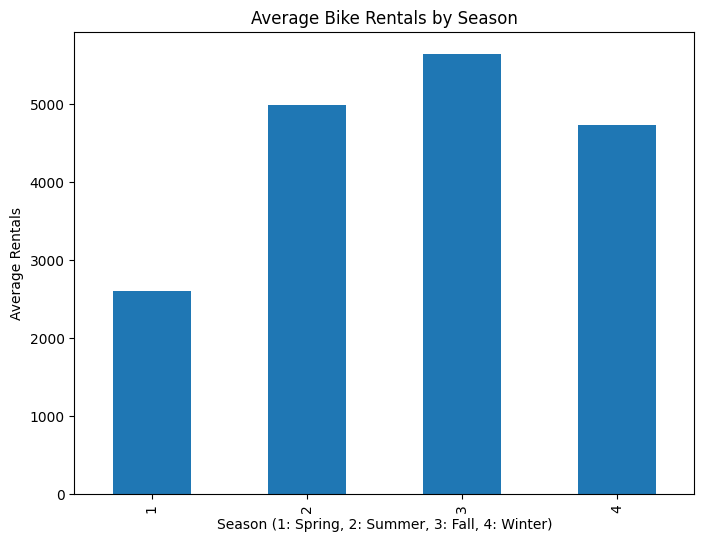

In [44]:
# membuat visualisasi dari distribusi peminjaman sepeda berdasarkan musim/seasonal

plt.figure(figsize=(8, 6))
day_data.groupby('season')['cnt'].mean().plot(kind='bar', title="Average Bike Rentals by Season")
plt.xlabel("Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Average Rentals")
plt.show()

insight:
- Musim dengan rata-rata peminjaman sepeda tertinggi adalah musim gugur (season = 3).
- Musim semi (season = 1) memiliki rata-rata peminjaman sepeda terendah.

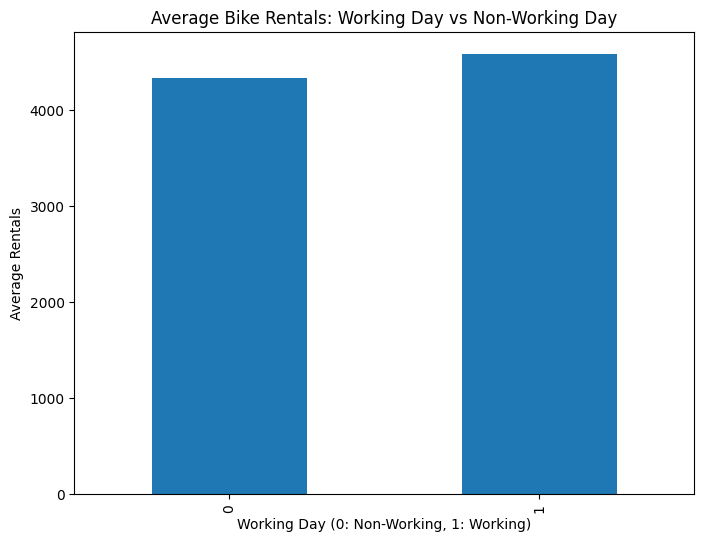

In [45]:
# membuat visualisasi dari distribusi peminjaman sepeda berdasarkan working day dan non-working day

plt.figure(figsize=(8, 6))
day_data.groupby('workingday')['cnt'].mean().plot(kind='bar', title="Average Bike Rentals: Working Day vs Non-Working Day")
plt.xlabel("Working Day (0: Non-Working, 1: Working)")
plt.ylabel("Average Rentals")
plt.show()

insight:
- Hari kerja (workingday = 1) memiliki rata-rata peminjaman lebih tinggi dibandingkan dengan hari libur (workingday = 0).

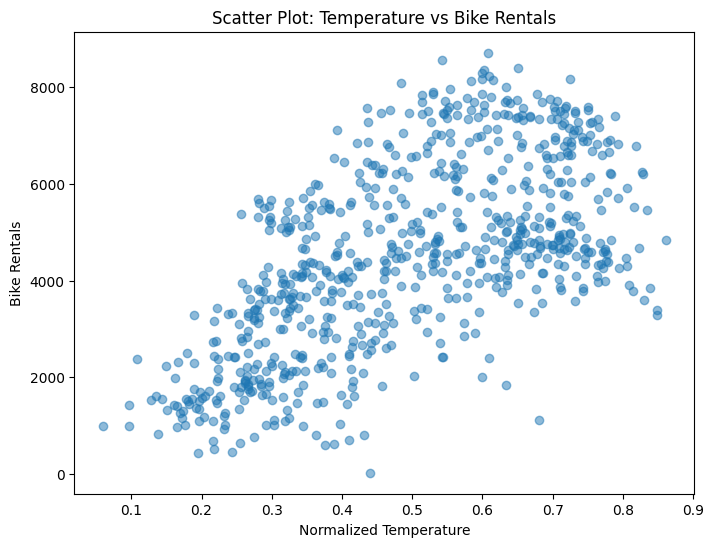

In [46]:
# membuat visualisasi dari hubungan atau korelasi peminjaman sepeda berdasarkan temperatur suhu cuaca

plt.figure(figsize=(8, 6))
plt.scatter(day_data['temp'], day_data['cnt'], alpha=0.5)
plt.title("Scatter Plot: Temperature vs Bike Rentals")
plt.xlabel("Normalized Temperature")
plt.ylabel("Bike Rentals")
plt.show()

insight:
- Pada scatter plot di atas, terlihat bahwa semakin tinggi suhu (temp), semakin tinggi pula jumlah peminjaman sepeda (cnt).

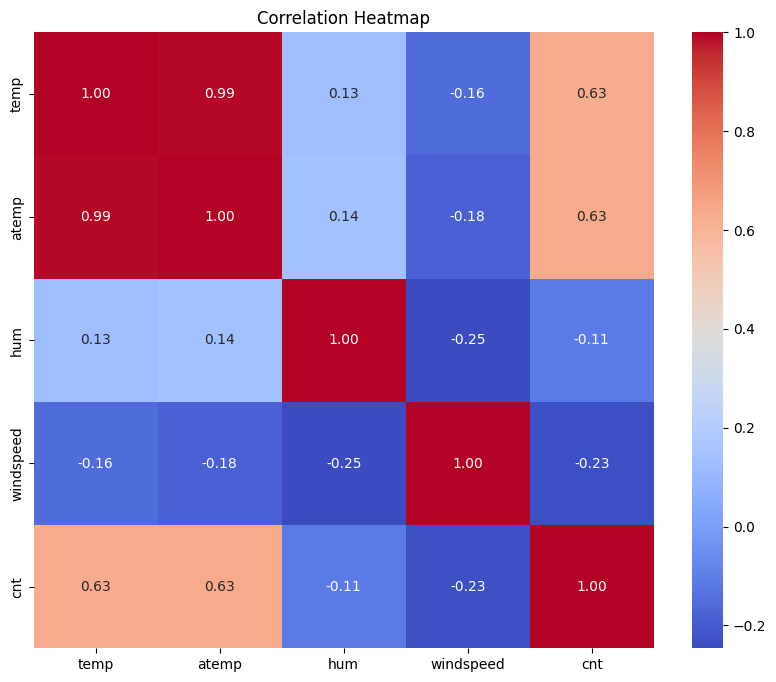

In [47]:
# Correlation heatmap
correlation = day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

insight:
- terdapat korelasi positif yang kuat (0.63) antara temp (suhu normalisasi) dan cnt (jumlah peminjaman).
- hum (kelembapan) memiliki korelasi yang lemah dengan cnt.
- windspeed memiliki korelasi negatif yang lemah juga dengan cnt.

In [124]:
# Merge datasets (day_data and hour_data) ke dalam satu dataframe all_df
# Menghitung median dari kolom 'hr' di hour_data
median_hr = hour_data['hr'].median()

# Mengisi kolom 'hr' di day_data dengan nilai median tersebut
day_data['hr'] = median_hr

# merge datasets
all_df = pd.concat([day_data, hour_data], ignore_index=True)

all_df['hr'] = all_df['hr'].astype(int) # memastikan kolom 'hr' tetap bertipe integer

# menampilkan 5 baris pertama setelah merge
print("\n5 baris pertama pada tabel all_df:")
all_df.head()


5 baris pertama pada tabel all_df:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,12
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,12
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,12
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,12
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,12


In [125]:
# melihat informasi dari all_df untuk melihat apakah ada missing value setelah penggabungan atau tipe data yang tidak sesuai

print("\nMerged DataFrame (all_df):")
all_df.info()


Merged DataFrame (all_df):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     18110 non-null  int64         
 1   dteday      18110 non-null  datetime64[ns]
 2   season      18110 non-null  int64         
 3   yr          18110 non-null  int64         
 4   mnth        18110 non-null  int64         
 5   holiday     18110 non-null  int64         
 6   weekday     18110 non-null  int64         
 7   workingday  18110 non-null  int64         
 8   weathersit  18110 non-null  int64         
 9   temp        18110 non-null  float64       
 10  atemp       18110 non-null  float64       
 11  hum         18110 non-null  float64       
 12  windspeed   18110 non-null  float64       
 13  casual      18110 non-null  int64         
 14  registered  18110 non-null  int64         
 15  cnt         18110 non-null  int64         

In [126]:
print("jumlah duplikasi data: ", all_df.duplicated().sum()) # melihat apakah ada duplikasi data setelah digabungkan

jumlah duplikasi data:  0


In [127]:
# membuat pivot table untuk melihat rata-rata rental berdasarkan bulan
pivot_month = all_df.pivot_table(values='cnt', index='mnth', aggfunc=np.mean)
print("\nPivot Table: Rata-rata rental berdasarkan bulan")
print(pivot_month)


Pivot Table: Rata-rata rental berdasarkan bulan
             cnt
mnth            
1     180.996647
2     216.526466
3     298.267101
4     359.511022
5     427.981935
6     461.789333
7     445.094194
8     456.986337
9     462.245825
10    426.109716
11    340.455578
12    273.185761


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\2216079423.py:2: FutureWarning: The provided callable <function mean at 0x000002904DBA2200> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_month = all_df.pivot_table(values='cnt', index='mnth', aggfunc=np.mean)


insight:
- Jumlah rata-rata peminjaman mencapai puncaknya di bulan Juli (musim panas).
- Bulan Januari hingga Maret memiliki jumlah rata-rata peminjaman terendah.

In [128]:
# membuat pivot table untuk melihat rata-rata rental berdasarkan jam dalam 1 hari
pivot_hour = all_df.pivot_table(values='cnt', index='hr', aggfunc=np.mean)
print("\nPivot Table: Rata-rata rental berdasarkan jam dalam 1 hari")
print(pivot_hour)


Pivot Table: Rata-rata rental berdasarkan jam dalam 1 hari
            cnt
hr             
0     53.898072
1     33.375691
2     22.869930
3     11.727403
4      6.352941
5     19.889819
6     76.044138
7    212.064649
8    359.011004
9    219.309491
10   173.668501
11   208.143054
12  2383.202879
13   253.661180
14   240.949246
15   251.233196
16   311.983562
17   461.452055
18   425.510989
19   311.523352
20   226.030220
21   172.314560
22   131.335165
23    87.831044


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\1352405094.py:2: FutureWarning: The provided callable <function mean at 0x000002904DBA2200> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_hour = all_df.pivot_table(values='cnt', index='hr', aggfunc=np.mean)


insight:
- Aktivitas peminjaman meningkat tajam pada pagi hari (jam 7-9) hingga sore hari (jam 17-19), yang kemungkinan berhubungan dengan perjalanan kerja dan aktivitas produktif kerja(pagi, siang, sore).
- kemudian peak nya berada pada jam 5 sore hingga jam 7 malam, kemungkinan selain perjalanan pulang kerja, pada jam segitu juga merupakan waktu prima untuk berolahraga atau bersepeda di sore hari

In [129]:
# membuat pivot table untuk melihat rata-rata rental berdasarkan weekday
pivot_weekday = all_df.pivot_table(values='cnt', index='weekday', aggfunc=np.mean)
print("\nPivot Table: Rata-rata peminjaman berdasarkan weekday")
print(pivot_weekday)


Pivot Table: Rata-rata peminjaman berdasarkan weekday
                cnt
weekday            
0        340.642117
1        352.556502
2        366.921392
3        366.846064
4        377.005825
5        376.526438
6        365.156286


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\1677043704.py:2: FutureWarning: The provided callable <function mean at 0x000002904DBA2200> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_weekday = all_df.pivot_table(values='cnt', index='weekday', aggfunc=np.mean)


insight:
- Hari kerja (rabu-jumat: weekday = 2-4) memiliki rata-rata peminjaman yang paling tinggi, walaupun pada akhir pekan sabtu dan minggu(weekday = 5-6) memiliki rata-rata peminjaman yang tinggi pula, kemungkinan akhir pekan merupakan waktu di mana kebanyakan orang-orang meminjam sepeda untuk berolah raga atau sekedar bersantai dengan sepeda.

In [145]:
# export all_df
all_df.to_csv("dashboard/all_data.csv", index=False)

**Insight:**
- kedua dataframe day_data dan hour_data sudah dimerge menjadi satu dataframe all_df
- tidak ada missing value ataupun duplikasi data setelah penggabungan
- rata-rata peminjaman mencapai puncaknya pada bulan juli (musim panas)
- peak peminjaman berada pada jam 5 sore hingga jam 7 malam, kemungkinan selain perjalanan pulang kerja, pada jam segitu juga merupakan waktu prima untuk berolahraga atau bersepeda di sore hari
- Hari kerja (rabu-jumat: weekday = 2-4) memiliki rata-rata peminjaman yang paling tinggi, walaupun pada akhir pekan sabtu dan minggu(weekday = 5-6) memiliki rata-rata peminjaman yang tinggi pula, kemungkinan akhir pekan merupakan waktu di mana kebanyakan orang-orang meminjam sepeda untuk berolah raga atau sekedar bersantai dengan sepeda.

## Visualization & Explanatory Analysis

### Bagaimana distribusi jumlah penyewaan sepeda berdasarkan musim?:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\1800778352.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=all_df, x="season", y="cnt", ci=None)


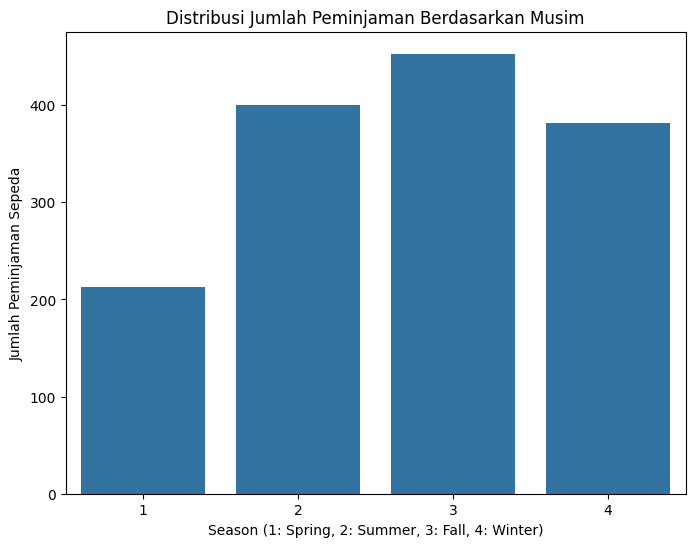

In [133]:
# visualisasi distribusi jumlah peminjaman berdasarkan musim menggunakan bar char

plt.figure(figsize=(8, 6))
sns.barplot(data=all_df, x="season", y="cnt", ci=None)
plt.title("Distribusi Jumlah Peminjaman Berdasarkan Musim")
plt.xlabel("Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

insight:
- Musim gugur (season = 3) memiliki rata-rata jumlah peminjaman sepeda tertinggi dibandingkan musim lainnya.
- Musim semi (season = 1) menunjukkan rata-rata jumlah peminjaman terendah.
- Cuaca yang lebih nyaman (tidak terlalu panas/dingin) cenderung meningkatkan jumlah peminjaman sepeda.

### Bagaimana pengaruh hari kerja dan hari libur terhadap jumlah penyewaan sepeda?:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\486985627.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=all_df, x="workingday", y="cnt", ci=None)


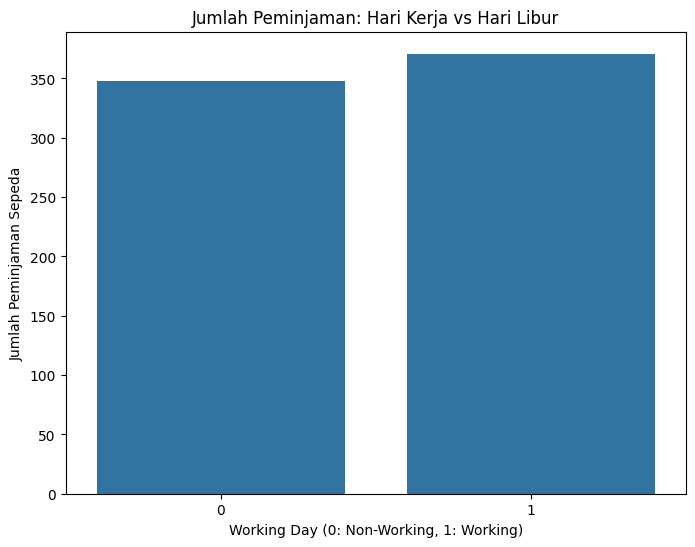

In [134]:
# Visualisasi pengaruh hari kerja dan libur terhadap jumlah peminjaman

plt.figure(figsize=(8, 6))
sns.barplot(data=all_df, x="workingday", y="cnt", ci=None)
plt.title("Jumlah Peminjaman: Hari Kerja vs Hari Libur")
plt.xlabel("Working Day (0: Non-Working, 1: Working)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

insight:
- Hari kerja (workingday = 1) memiliki rata-rata jumlah peminjaman lebih tinggi dibandingkan hari libur (workingday = 0).
- Mungkin sepeda lebih sering digunakan untuk aktivitas harian seperti perjalanan ke kantor atau sekolah pada hari kerja.

### Seberapa besar dampak kondisi cuaca terhadap jumlah penyewaan sepeda?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19556\3349552336.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=all_df, x="weathersit", y="cnt", ci=None)


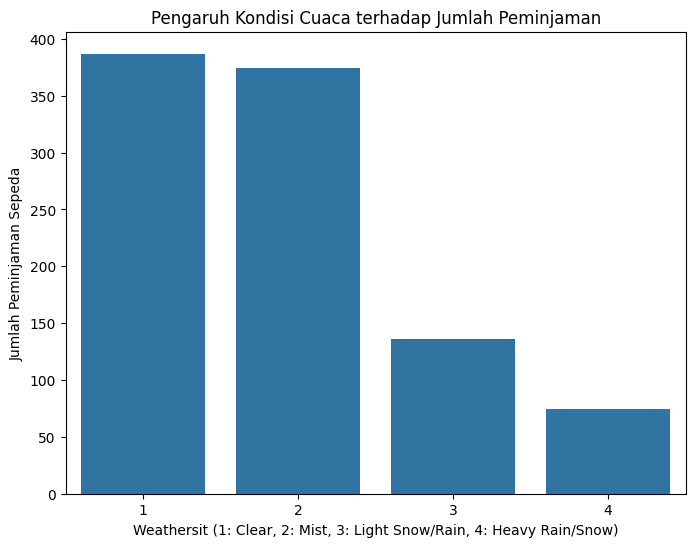

In [135]:
# Visualisasi dampak kondisi cuaca terhadap jumlah peminjaman

plt.figure(figsize=(8, 6))
sns.barplot(data=all_df, x="weathersit", y="cnt", ci=None)
plt.title("Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman")
plt.xlabel("Weathersit (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

insight:
- Kondisi cuaca cerah atau sedikit berawan (weathersit = 1) menunjukkan jumlah peminjaman tertinggi.
- Cuaca buruk seperti hujan deras atau salju lebat (weathersit = 4) menunjukkan jumlah peminjaman paling rendah.
- Kondisi cuaca yang buruk berdampak signifikan terhadap penurunan jumlah peminjaman sepeda.

### Bagaimana tren penggunaan sepeda dari tahun 2011 hingga 2012?

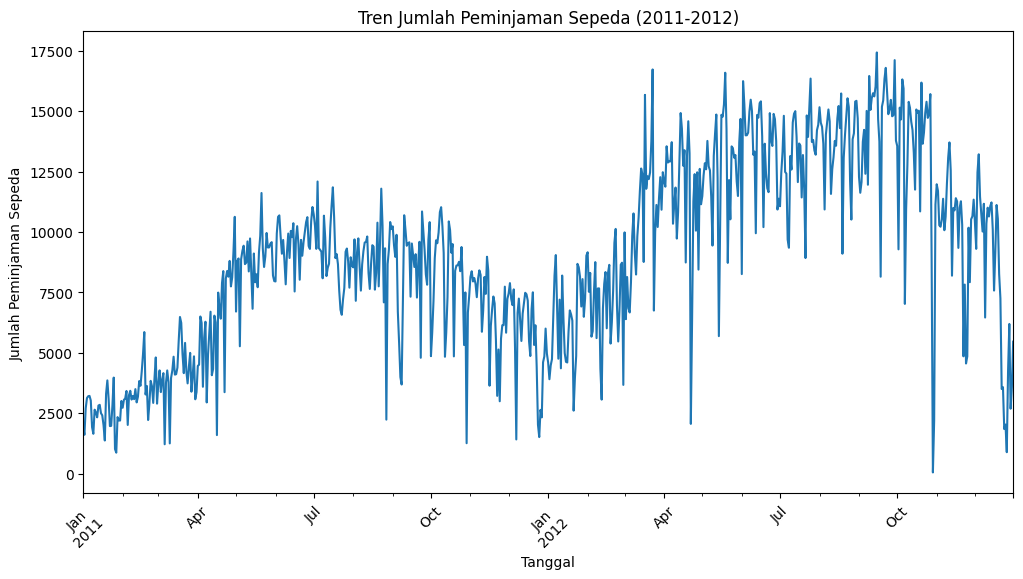

In [136]:
# Visualisasi tren jumlah peminjaman dari tahun 2011 hingga 2012

plt.figure(figsize=(12, 6))
all_df.groupby("dteday")["cnt"].sum().plot()
plt.title("Tren Jumlah Peminjaman Sepeda (2011-2012)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=45)
plt.show()

insight:
- Tren jumlah peminjaman sepeda menunjukkan peningkatan dari awal tahun 2011 hingga akhir tahun 2012.
- Pola musiman terlihat jelas, dengan puncak peminjaman di bulan-bulan tertentu.
- Popularitas sistem peminjaman sepeda meningkat selama periode dua tahun, dengan fluktuasi musiman.

### Faktor apa yang paling memengaruhi jumlah penyewaan sepeda (suhu, kelembapan, angin)?

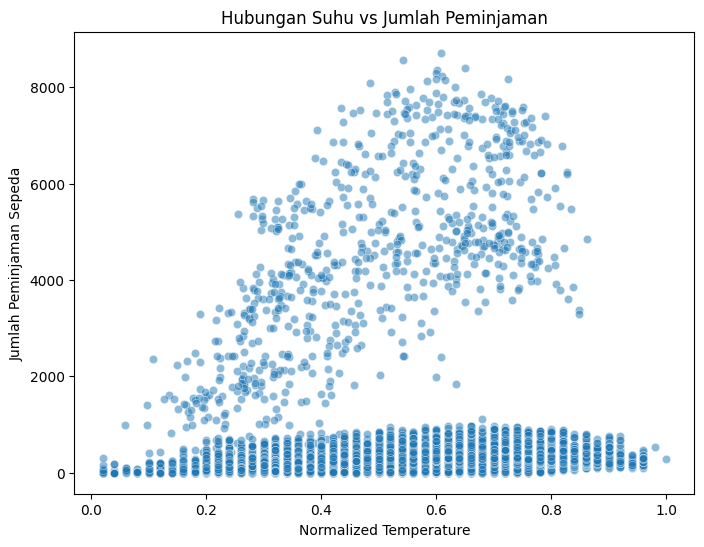

In [137]:
# hubungan suhu terhadap jumlah peminjaman
plt.figure(figsize=(8, 6))
sns.scatterplot(data=all_df, x="temp", y="cnt", alpha=0.5)
plt.title("Hubungan Suhu vs Jumlah Peminjaman")
plt.xlabel("Normalized Temperature")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

insight:
- Suhu (temp) memiliki hubungan positif dengan jumlah peminjaman: semakin tinggi suhu, semakin banyak peminjaman sepeda.

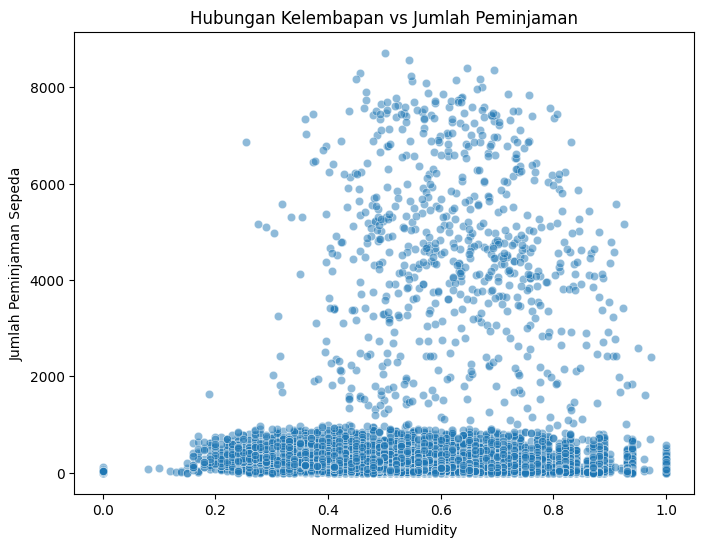

In [138]:
# hubungan kelembapan udara terhadap jumlah peminjaman
plt.figure(figsize=(8, 6))
sns.scatterplot(data=all_df, x="hum", y="cnt", alpha=0.5)
plt.title("Hubungan Kelembapan vs Jumlah Peminjaman")
plt.xlabel("Normalized Humidity")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

insight:
- Kelembapan (hum) menunjukkan hubungan negatif yang lemah dengan jumlah peminjaman.

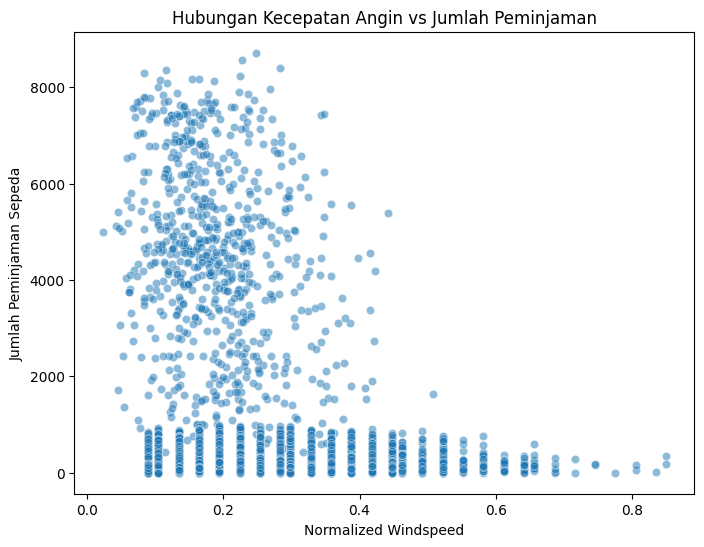

In [139]:
# hubungan kecepatan angin dengan jumlah peminjaman sepeda
plt.figure(figsize=(8, 6))
sns.scatterplot(data=all_df, x="windspeed", y="cnt", alpha=0.5)
plt.title("Hubungan Kecepatan Angin vs Jumlah Peminjaman")
plt.xlabel("Normalized Windspeed")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

**Insight:**
- Kecepatan angin (windspeed) juga memiliki hubungan negatif yang lemah dengan jumlah peminjaman.
- Sehingga, saya mendapatkan kesimpulan bahwa suhu adalah faktor yang paling berpengaruh terhadap jumlah peminjaman sepeda dibandingkan kelembapan dan kecepatan angin.

## Analisis Lanjutan (Opsional)

### RFM ANALYSIS

In [140]:
# Calculate Recency
latest_date = all_df['dteday'].max()
all_df['Recency'] = (latest_date - all_df['dteday']).dt.days

# Calculate Frequency
rfm_frequency = all_df.groupby('registered').size().reset_index(name='Frequency')

# Calculate Monetary (total rentals per user)
rfm_monetary = all_df.groupby('registered')['cnt'].sum().reset_index(name='Monetary')

# Calculate Recency for each user (minimum recency per registered user)
rfm_recency = all_df.groupby('registered')['Recency'].min().reset_index(name='Recency')

# Combine RFM components
rfm_table = rfm_recency.merge(rfm_frequency, on='registered', how='inner')
rfm_table = rfm_table.merge(rfm_monetary, on='registered', how='inner')

# Display the RFM Table
print("\nRFM Analysis Table:")
print(rfm_table.head())


RFM Analysis Table:
   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


- Recency (R): Seberapa baru aktivitas terakhir pengguna.
- Frequency (F): Seberapa sering pengguna meminjam sepeda.
- Monetary (M): Total jumlah peminjaman sepeda.

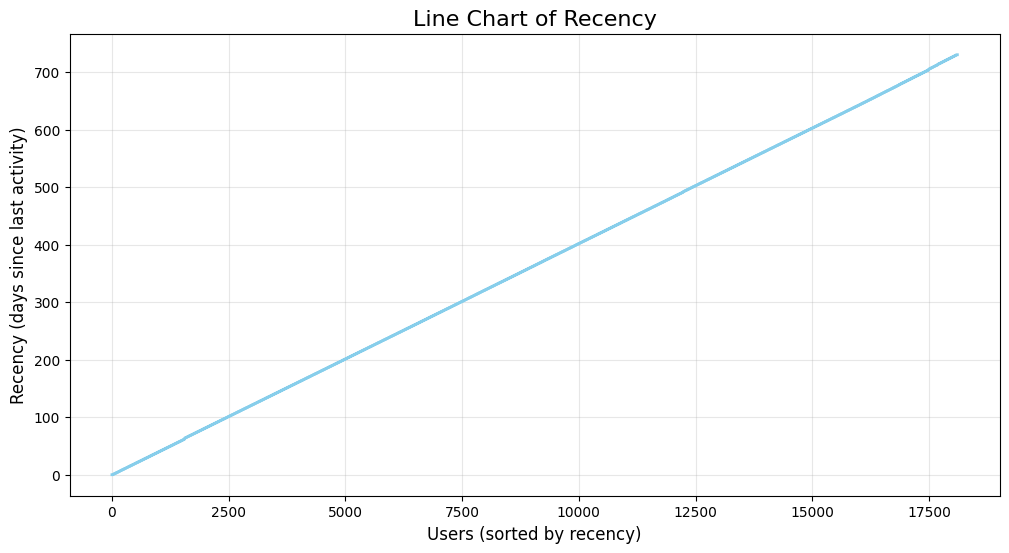

In [ ]:
# Sort data untuk line charts
recency_sorted = all_df['Recency'].sort_values().reset_index(drop=True)
frequency_sorted = rfm_table.sort_values(by='Frequency', ascending=False).reset_index()
monetary_sorted = rfm_table.sort_values(by='Monetary', ascending=False).reset_index()

# Visualisasi line chart untuk recency
plt.figure(figsize=(12, 6))
plt.plot(recency_sorted, color='skyblue', linewidth=2)
plt.title("Line Chart of Recency", fontsize=16)
plt.xlabel("Users (sorted by recency)", fontsize=12)
plt.ylabel("Recency (days since last activity)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

insight:
- Sebagian besar pengguna meminjam sepeda dalam waktu yang dekat dari tanggal terakhir dataset.
- Menunjukkan bahwa sistem peminjaman sepeda tetap digunakan secara aktif oleh mayoritas pengguna.
- Hanya sedikit pengguna dengan Recency tinggi, yang menunjukkan mereka tidak aktif dalam waktu yang lama.

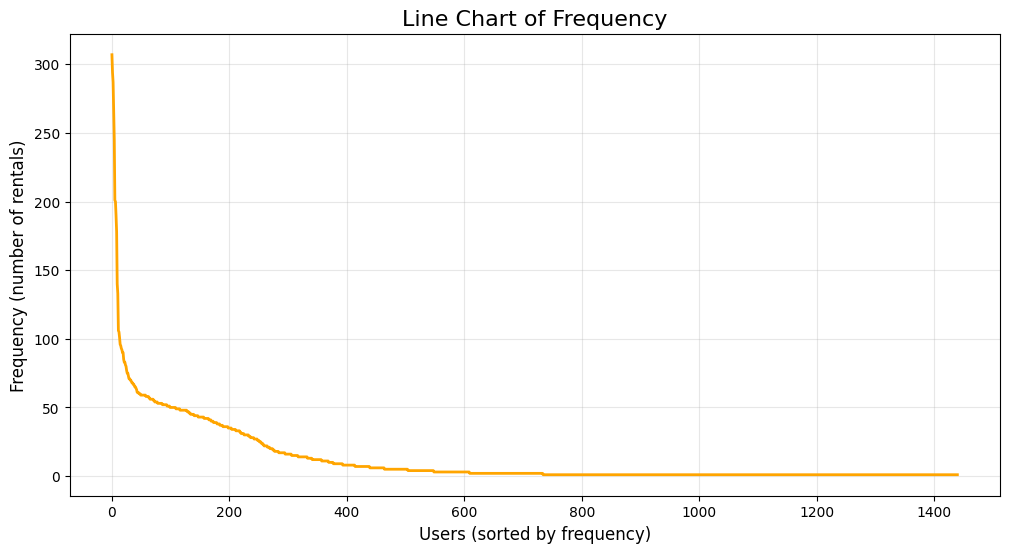

In [143]:
# line chart untuk frequency
plt.figure(figsize=(12, 6))
plt.plot(frequency_sorted['Frequency'], color='orange', linewidth=2)
plt.title("Line Chart of Frequency", fontsize=16)
plt.xlabel("Users (sorted by frequency)", fontsize=12)
plt.ylabel("Frequency (number of rentals)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

insight:
- Mayoritas pengguna memiliki frekuensi peminjaman yang rendah, mungkin hanya untuk kebutuhan sesekali.
- Namun, ada beberapa pengguna dengan frekuensi peminjaman yang sangat tinggi, yang kemungkinan adalah pelanggan tetap atau pengguna yang memanfaatkan sepeda untuk kebutuhan harian.
- Pola ini menunjukkan bahwa segmen kecil pengguna menjadi kontributor utama untuk jumlah peminjaman secara keseluruhan.

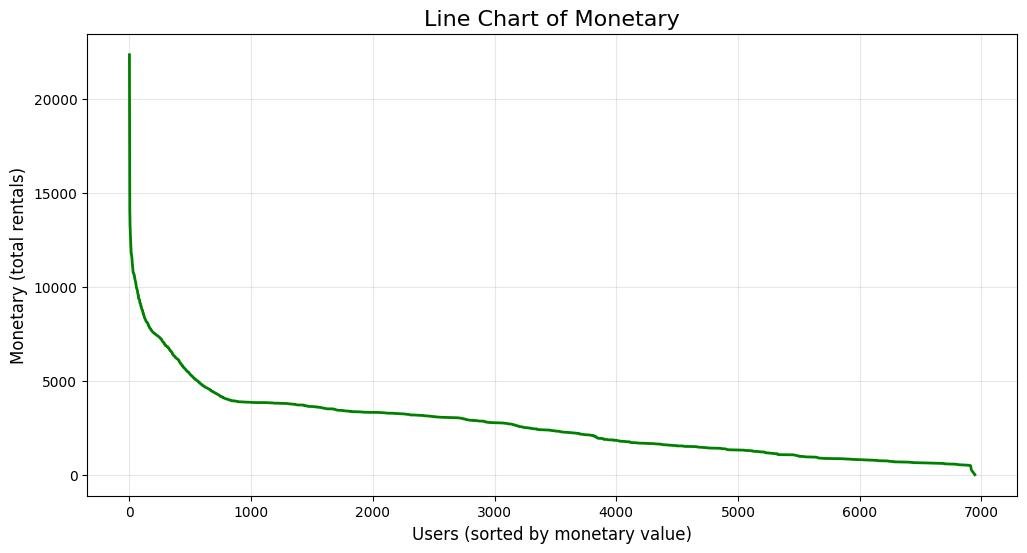

In [144]:
# line chart untuk monetary
plt.figure(figsize=(12, 6))
plt.plot(rfm_table['registered'], monetary_sorted['Monetary'], color='green', linewidth=2)
plt.title("Line Chart of Monetary", fontsize=16)
plt.xlabel("Users (sorted by monetary value)", fontsize=12)
plt.ylabel("Monetary (total rentals)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

insight:
- Nilai total peminjaman (monetary) menunjukkan pola serupa dengan frekuensi.
- Sebagian besar pengguna menghasilkan nilai peminjaman rendah, sementara segmen kecil pengguna dengan monetary tinggi menjadi kontributor utama pendapatan karena melakukan rental lebih sering/banyak.
- Pengguna dengan nilai monetary tinggi kemungkinan adalah pengguna yang sering memanfaatkan sistem peminjaman sepeda untuk kebutuhan harian atau perjalanan kerja.

## Conclusion

1. Conclution pertanyaan 1: Bagaimana distribusi jumlah penyewaan sepeda berdasarkan musim?
- Musim gugur (season = 3) memiliki rata-rata jumlah peminjaman sepeda tertinggi dibandingkan musim lainnya.
- Musim semi (season = 1) menunjukkan rata-rata jumlah peminjaman terendah.
- Cuaca yang lebih nyaman (tidak terlalu panas/dingin) cenderung meningkatkan jumlah peminjaman sepeda.

2. Conclution pertanyaan 2: Bagaimana pengaruh hari kerja dan hari libur terhadap jumlah penyewaan sepeda?
- Hari kerja (workingday = 1) memiliki rata-rata jumlah peminjaman lebih tinggi dibandingkan hari libur (workingday = 0).
- Sehingga saya simpulkan bahwa sepeda lebih sering digunakan untuk aktivitas harian seperti perjalanan ke kantor atau sekolah pada hari kerja.

3. Conclution pertanyaan 3: Seberapa besar dampak kondisi cuaca terhadap jumlah penyewaan sepeda?
- Kondisi cuaca cerah atau sedikit berawan (weathersit = 1) menunjukkan jumlah peminjaman tertinggi.
- Cuaca buruk seperti hujan deras atau salju lebat (weathersit = 4) menunjukkan jumlah peminjaman paling rendah.
- Kondisi cuaca yang buruk berdampak signifikan terhadap penurunan jumlah peminjaman sepeda.

4. Conclution pertanyaan 4: Bagaimana tren penggunaan sepeda dari tahun 2011 hingga 2012?
- Tren jumlah peminjaman sepeda menunjukkan peningkatan dari awal tahun 2011 hingga akhir tahun 2012.
- Pola musiman terlihat jelas, dengan puncak peminjaman di bulan-bulan tertentu.
- Popularitas sistem peminjaman sepeda meningkat selama periode dua tahun, dengan fluktuasi musiman.

5. Conclution pertanyaan 5: Faktor apa yang paling memengaruhi jumlah penyewaan sepeda (suhu, kelembapan, angin)?
- Pada scatterplot pertama di mana memperlihatkan hubungan suhu dengan jumlah peminjaman sepeda memperlihatkan, bahwa suhu (temp) memiliki hubungan positif dengan jumlah peminjaman: semakin tinggi suhu, semakin banyak peminjaman sepeda.
- Namun pada scatterplot kedua dan ketiga dimana kelembapan udara dan kecepatan angin, memiliki hubungan negatif yang sangat lemah dengan jumlah peminjaman.
- Sehingga, saya mendapatkan kesimpulan bahwa suhu adalah faktor yang paling berpengaruh terhadap jumlah peminjaman sepeda dibandingkan kelembapan dan kecepatan angin.

6. Conclution pada RFM analysis:
- Segmentasi pengguna: Mayoritas pengguna adalah pengguna sesekali (dengan Frequency dan Monetary rendah), sementara pengguna reguler membentuk segmen kecil tetapi signifikan dalam total peminjaman sepeda.
- Aktivitas pengguna: Sebagian besar pengguna tetap aktif (dengan Recency rendah), yang menunjukkan sistem peminjaman sepeda digunakan secara konsisten.
- Peluang: Sistem dapat mempertimbangkan untuk meningkatkan keterlibatan pengguna sesekali melalui program loyalitas atau mungkin event sepeda seperti event marathon pada lari, sehingga akan memunculkan minat dari komunitas dan mendorong mereka menjadi pengguna reguler, selain itu juga bisa membangun rasa interest atau ketertarikan dari orang awam soal bersepada dari event-event itu.